<a href="https://colab.research.google.com/github/sbm367/nyuparse/blob/master/NYU_Analytic_Statistics_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

New Stuff

In [21]:
# import libs
import numpy as np
import pandas as pd


# Get the data
github_url = 'https://github.com/sbm367/nyuparse/blob/master/Final%20Survey%20Data%2C%20Cleaned%2C%20Anonymize.csv'
df = pd.read_csv(github_url)

df.head()


ParserError: ignored

---------------------------------------------------------------------------

NYU Analytic Statistics Final Project Part 2

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [ ]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1eTN3IO-kS0HD84a_Tsaq2UDskv5Hw2nUsEtYvHQyIJ8/edit#gid=2103295413')
sheet = wb.worksheet('NYU Telehealth Adoption Survey_March 8, 2021_17.58')
data = sheet.get_all_values()
#print( type(data) )

<class 'list'>


In [ ]:
# Save data to serilized byte obj
import pickle 

out_file = open('list_freeze','wb')
pickle.dump(data, out_file)
out_file.close()

# this didnt work, i should probably save this to a local csv 

In [ ]:
%ls
%rm csv_freeze

adc.json  list_freeze  sample_data/
rm: cannot remove 'csv_freeze': No such file or directory


In [ ]:
'''
in_file = open('list_freeze','rb') 
data_list= list(in_file)
in_file.close()
print(type(data_list))
print(data_list[0])
'''


df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[3:]
df.head()


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18_Browser,Q18_Version,Q18_Operating System,Q18_Resolution,Q19_First Click,Q19_Last Click,Q19_Page Submit,Q19_Click Count,refID,rand
3,2021-03-03 14:30:57,2021-03-03 14:32:09,IP Address,216.165.127.12,100,71,TRUE,2021-03-03 14:32:09,R_3PFvmOtYU5oMJzk,Quinn,Gwendolyn,Gwendolyn.Quinn@nyumc.org,,40.72520447,-73.94400024,email,EN,Female,White,Yes,56,,No,Yes,1,25,Yes,2,2,Somewhat more,"No, but I would like to try",,,Yes,Chrome,88.0.4324.190,Windows NT 10.0,1920x1080,2.317,43.384,46.842,17,,4956
4,2021-03-03 14:55:37,2021-03-03 14:57:08,IP Address,209.122.243.102,100,90,TRUE,2021-03-03 14:57:08,R_2frhNOAQbLRraBk,Ling,Ariane,Ariane.Ling@nyumc.org,,40.74279785,-73.97119904,email,EN,Female,Asian,No,34,Other,No,Yes,0,20,No,,,About the same,"No, but I would like to try",,,Yes,Chrome,88.0.4324.96,Macintosh,1440x900,2.794,61.458,66.391,7,,4180
5,2021-03-03 16:11:17,2021-03-03 16:12:44,IP Address,216.165.126.117,100,86,TRUE,2021-03-03 16:12:44,R_293Mhj9hYj8MI5V,Chen,Zhe,Zhe.Chen@nyumc.org,,40.74279785,-73.97119904,email,EN,Male,Asian,No,44,Other,No,No,,,No,,,About the same,"No, but I would like to try",,,No,Chrome,80.0.3987.87,Macintosh,2560x1440,4.127,40.687,44.049,6,,5743
6,2021-03-03 16:49:34,2021-03-03 16:51:04,IP Address,74.105.255.69,100,90,TRUE,2021-03-03 16:51:05,R_1hW0HVkJLYy9HnD,Cascio,Denise,Denise.Cascio@nyumc.org,,40.99819946,-74.16619873,email,EN,Female,White,No,44,Other,No,Yes,0,2,No,,,About the same,"No, I would defiantly not want to try",,,No,Safari iPhone,14.0.3,iPhone,414x896,4.906,50.918,52.748,16,,426
7,2021-03-03 19:14:25,2021-03-03 19:17:40,IP Address,216.165.126.103,100,194,TRUE,2021-03-03 19:17:40,R_1I60oBU9NGzwke5,Bizekis,Costas,Costas.Bizekis@nyulangone.org,,40.74279785,-73.97119904,email,EN,Male,Decline to Identify,Decline to Identify,50,Physician,No,Yes,0,4,Yes,2,1,Somewhat more,"No, but I would like to try",,,Yes,Chrome,88.0.4324.190,Windows NT 10.0,1920x1080,3.101,81.452,86.923,17,,3961


Maybe Just pickle the dataframe instead? 

In [ ]:
'''
out_file = open('df','wb')
pickle.dump(df, out_file)
out_file.close()
'''

df.to_pickle('./df2.pkl')

In [ ]:
%ls -alt
%rm df

total 100
drwxr-xr-x 1 root root  4096 Mar  9 00:19 ./
-rw-r--r-- 1 root root 34307 Mar  9 00:19 df2.pkl
-rw-r--r-- 1 root root 34307 Mar  9 00:18 df2
-rw-r--r-- 1 root root   720 Mar  8 23:00 adc.json
drwxr-xr-x 1 root root  4096 Mar  8 23:00 .config/
drwxr-xr-x 1 root root  4096 Mar  8 22:53 ../
drwxr-xr-x 1 root root  4096 Mar  5 14:37 sample_data/
rm: cannot remove 'df': No such file or directory


In [ ]:
df = []
df.head()

AttributeError: ignored

In [ ]:
'''
in_file = open('df','rb') 
df = pd.DataFrame(in_file)
in_file.close()
'''
import base64

in_file = open('df2','rb') 
df_p = in_file.read()
df64 = base64.b64encode(df_p)
in_file.close()


df = pd.read_pickle(df64)
df.head()


AttributeError: ignored

In [ ]:
df.describe()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18_Browser,Q18_Version,Q18_Operating System,Q18_Resolution,Q19_First Click,Q19_Last Click,Q19_Page Submit,Q19_Click Count,refID,rand
count,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
unique,34,34,1,30,1,28,1,34,34,33,33,34,1,22,21,1,1,2,5,3,20,4,1,2,6,15,2,6,5,5,4,3,3,2,5,15,6,14,34,34,34,18,1,34
top,2021-03-08 8:58:50,2021-03-06 13:34:21,IP Address,216.165.126.19,100,90,TRUE,2021-03-08 9:05:17,R_1I60oBU9NGzwke5,Passo,Seth,Zhe.Chen@nyumc.org,,40.74279785,-73.97119904,email,EN,Female,White,No,34,Physician,No,Yes,0,,Yes,,,Somewhat more,"No, but I would like to try",,,Yes,Chrome,14.0.3,Macintosh,1440x900,3.543,113.535,66.391,16,,9319
freq,1,1,34,3,34,2,34,1,1,2,2,1,34,11,11,34,34,22,23,32,3,24,34,28,21,6,17,17,17,17,23,32,32,19,15,14,12,6,1,1,1,4,34,1


In [ ]:
df['Q12'].describe()

count     34
unique     5
top         
freq      17
Name: Q12, dtype: object

In [ ]:
df[['Q11','Q12']].mean()

0
Q11    6.479412e+15
Q12    6.176471e+14
dtype: float64

for some reason the describe fcn isnt working

also, need to pre-process this data so that blank values are set to
Q8, Q9, Q11, Q12, Q15, Q16

In [ ]:
print(df.Q8)
'''
df_test_col = df['Q8']
print(type(df_test_col))
print(df_test_col)
print (df_test_col.dtypes)
'''

'''
c = df.select_dtypes(np.number).columns
df[c] = df[c].fillna(0)
df = df.fillna("")
print (df)
'''
df['Q8'] = df['Q8'].replace(r'^\s*$', 0, regex=True)
print(df['Q8'])

3      1
4      0
5       
6      0
7      0
8      1
9      0
10     0
11     0
12     0
13      
14     0
15     0
16     0
17     0
18      
19     0
20     0
21     0
22     0
23    10
24     0
25      
26      
27     0
28    10
29     1
30     0
31      
32     0
33     0
34    15
35     0
36    12
Name: Q8, dtype: object
3      1
4      0
5      0
6      0
7      0
8      1
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23    10
24     0
25     0
26     0
27     0
28    10
29     1
30     0
31     0
32     0
33     0
34    15
35     0
36    12
Name: Q8, dtype: object


In [ ]:
df=df.replace(r'^\s*$', '0', regex=True)
df=df.replace(r'> 45', '46', regex=True)

df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18_Browser,Q18_Version,Q18_Operating System,Q18_Resolution,Q19_First Click,Q19_Last Click,Q19_Page Submit,Q19_Click Count,refID,rand
3,2021-03-03 14:30:57,2021-03-03 14:32:09,IP Address,216.165.127.12,100,71,TRUE,2021-03-03 14:32:09,R_3PFvmOtYU5oMJzk,Quinn,Gwendolyn,Gwendolyn.Quinn@nyumc.org,0,40.72520447,-73.94400024,email,EN,Female,White,Yes,56,0,No,Yes,1,25,Yes,2,2,Somewhat more,"No, but I would like to try",0,0,Yes,Chrome,88.0.4324.190,Windows NT 10.0,1920x1080,2.317,43.384,46.842,17,0,4956
4,2021-03-03 14:55:37,2021-03-03 14:57:08,IP Address,209.122.243.102,100,90,TRUE,2021-03-03 14:57:08,R_2frhNOAQbLRraBk,Ling,Ariane,Ariane.Ling@nyumc.org,0,40.74279785,-73.97119904,email,EN,Female,Asian,No,34,Other,No,Yes,0,20,No,0,0,About the same,"No, but I would like to try",0,0,Yes,Chrome,88.0.4324.96,Macintosh,1440x900,2.794,61.458,66.391,7,0,4180
5,2021-03-03 16:11:17,2021-03-03 16:12:44,IP Address,216.165.126.117,100,86,TRUE,2021-03-03 16:12:44,R_293Mhj9hYj8MI5V,Chen,Zhe,Zhe.Chen@nyumc.org,0,40.74279785,-73.97119904,email,EN,Male,Asian,No,44,Other,No,No,0,0,No,0,0,About the same,"No, but I would like to try",0,0,No,Chrome,80.0.3987.87,Macintosh,2560x1440,4.127,40.687,44.049,6,0,5743
6,2021-03-03 16:49:34,2021-03-03 16:51:04,IP Address,74.105.255.69,100,90,TRUE,2021-03-03 16:51:05,R_1hW0HVkJLYy9HnD,Cascio,Denise,Denise.Cascio@nyumc.org,0,40.99819946,-74.16619873,email,EN,Female,White,No,44,Other,No,Yes,0,2,No,0,0,About the same,"No, I would defiantly not want to try",0,0,No,Safari iPhone,14.0.3,iPhone,414x896,4.906,50.918,52.748,16,0,426
7,2021-03-03 19:14:25,2021-03-03 19:17:40,IP Address,216.165.126.103,100,194,TRUE,2021-03-03 19:17:40,R_1I60oBU9NGzwke5,Bizekis,Costas,Costas.Bizekis@nyulangone.org,0,40.74279785,-73.97119904,email,EN,Male,Decline to Identify,Decline to Identify,50,Physician,No,Yes,0,4,Yes,2,1,Somewhat more,"No, but I would like to try",0,0,Yes,Chrome,88.0.4324.190,Windows NT 10.0,1920x1080,3.101,81.452,86.923,17,0,3961


# Stats and regressions libs

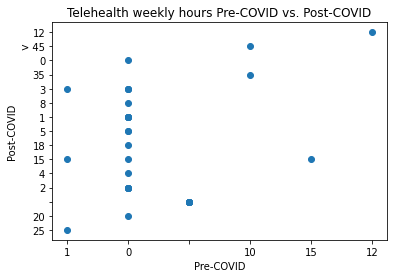

3      1
4      0
5       
6      0
7      0
8      1
9      0
10     0
11     0
12     0
13      
14     0
15     0
16     0
17     0
18      
19     0
20     0
21     0
22     0
23    10
24     0
25      
26      
27     0
28    10
29     1
30     0
31      
32     0
33     0
34    15
35     0
36    12
Name: Q8, dtype: object
3       25
4       20
5         
6        2
7        4
8       15
9        2
10       2
11      18
12      15
13        
14       2
15       5
16       1
17       1
18        
19       1
20       8
21       3
22       3
23      35
24       0
25        
26        
27       3
28    > 45
29       3
30       1
31        
32       2
33       5
34      15
35       1
36      12
Name: Q9, dtype: object


In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

'''
df.Q9 = df.Q9.replace(r'> 45', 46, regex=True)
print(df.Q9)
'''

plt.scatter(df.Q8, df.Q9)
plt.title('Telehealth weekly hours Pre-COVID vs. Post-COVID')
plt.xlabel('Pre-COVID')
plt.ylabel('Post-COVID')
plt.show()

print(df.Q8)
print(df.Q9)


# 1. Background and Motivation

In the wake of the covid 19 pandemic [a lot of people] lost thier healthcare because this is america. 

often a critical resource for the un insured and underinsured are volunteer or free clinics, but because of covid it hard to do that stuff in person.

at the same time during covid, telehealth seems to heave really taken off as a way to provide care. it seems like inteerms of volunteercare, where the need is greater than ever, telehealth adoption is at the lowerst.

this could be because free clinics arnt great with adapting to the tech, or becasue doctors arnt, or because they just dont have telehealth volunteering oprotunities,

so we made this survey to find out. 

# 2. Methodology




include link to survey here : https://nyu.qualtrics.com/jfe/form/SV_1XG93kLodn2ByNT

# 3. Summary of Findings

# 4. Disscusion of Findings

## 4. a. Descriptive Analysis

summary stats andeverything here

## 4. b. Statistical Analysis

stats and regression here 

# 5. Limitations (of Survey & Data )

# 6. Conclusions & Further Research

# A. Apendix